In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# own function to plot
def plot_xvars(df, xvar, yvar, sort=False):
    
    tmp = df.copy()
    tmp['n'] = 1
    xvar = str(xvar)
    yvar = str(yvar)
    n_rows = tmp.shape[0]
    
    if sort:
        tmp = (tmp.groupby(xvar).agg({'n':'sum', yvar:'mean'})
               .rename(columns={'n':'count'}).sort_values('count', ascending=False))
    else:
        tmp = (tmp.groupby(xvar).agg({'n':'sum', yvar:'mean'})
               .rename(columns={'n':'count'}))
        
    tmp['pct'] = tmp['count'].map(lambda x: round(100*x/n_rows,2))
    tmp[yvar] = round(tmp[yvar],4)
    
    fig = plt.figure(figsize=(12,8))
    ax = tmp.pct.plot(kind='bar', use_index=True, color='orange', label='pct')
    ax.set_ylim(0,101)
    ax.set_ylabel('Percent of counts', color='black')
    labels = list(tmp.pct)
    for i, v in enumerate(labels):
        ax.text(i-.05, v/labels[i], '{}%'.format(labels[i]))
    
    ax2 = ax.twinx()
    ax2.plot(tmp[[yvar]].values,linestyle='-', marker='o', linewidth=2.0, color='tab:blue', label=yvar)
    ax2.set_ylim(0,1.01)
    ax2.set_ylabel(yvar, color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    labels = list(tmp[yvar])
    for i, v in enumerate(labels):
        ax2.text(i-.05, labels[i]+.02, '{}'.format(labels[i]), color='tab:blue')
    plt.legend()
    plt.title('Frequency plot of {} by {}'.format(xvar,yvar), fontweight='bold', fontsize=14)
    plt.show()
    
    return tmp[['count','pct',yvar]]

# load data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

#df_train = df_train[df_train.SibSp<=4]
print('Frequency of Survived: {}'.format(df_train['Survived'].mean()))

Frequency of Survived: 0.3838383838383838


## Pclass

This ticket class with values (1 = 1st, 2 = 2nd, 3 = 3rd). A proxy for socio-economic status (SES)
+ 1st = Upper
+ 2nd = Middle
+ 3rd = Lower

The probability of survive is decreasing with Pclass values, the highest frequency is for first class with 62.96%, see details in the graph below. Thus, the people of the first class is more likely to survive than others.

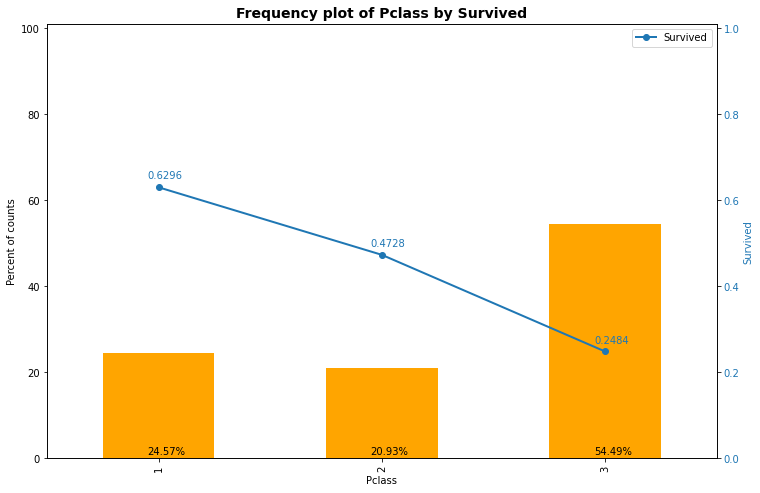

,count,pct,Survived
Pclass,,,
1,216,24.57,0.6296
2,184,20.93,0.4728
3,479,54.49,0.2484


In [3]:
plot_xvars(df=df_train, xvar='Pclass', yvar='Survived')

## Sex

The ladies has almost 4 times more probability to survived than gentlemans.

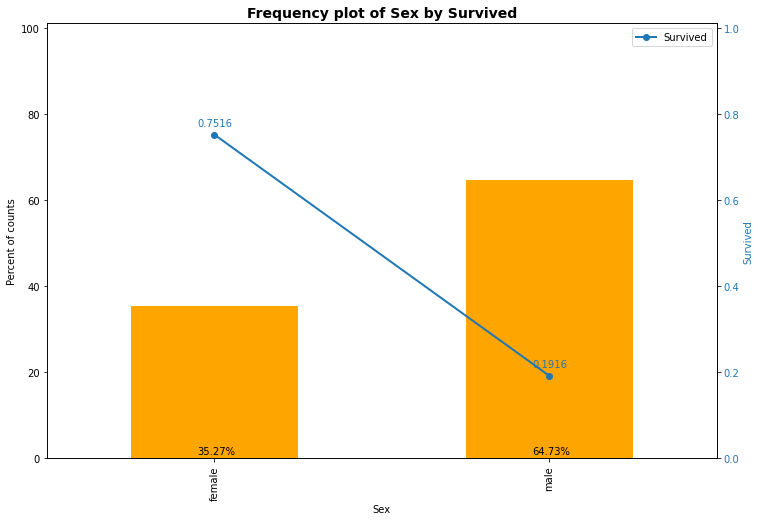

,count,pct,Survived
Sex,,,
female,310,35.27,0.7516
male,569,64.73,0.1916


In [4]:
plot_xvars(df=df_train, xvar='Sex', yvar='Survived')

## SibSp

Number of siblings / spouses aboard the Titanic

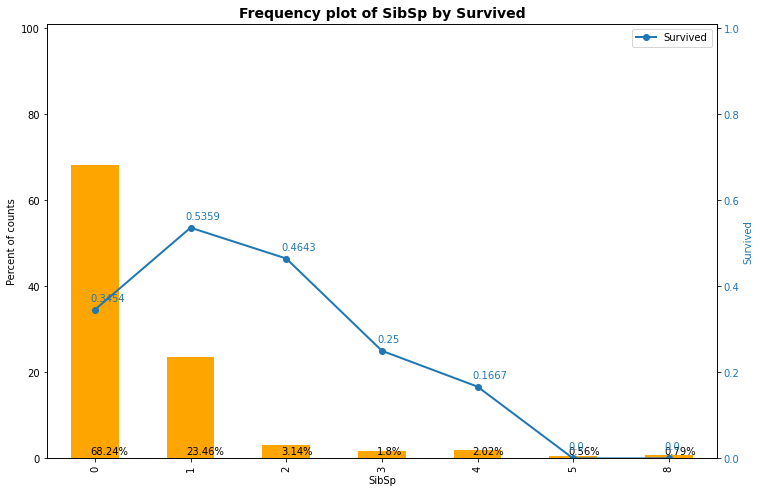

,count,pct,Survived
SibSp,,,
0,608,68.24,0.3454
1,209,23.46,0.5359
2,28,3.14,0.4643
3,16,1.80,0.2500
4,18,2.02,0.1667
5,5,0.56,0.0000
8,7,0.79,0.0000


In [27]:
plot_xvars(df=df_train, xvar='SibSp', yvar='Survived')

## Parch

Number of parents / children aboard the Titanic

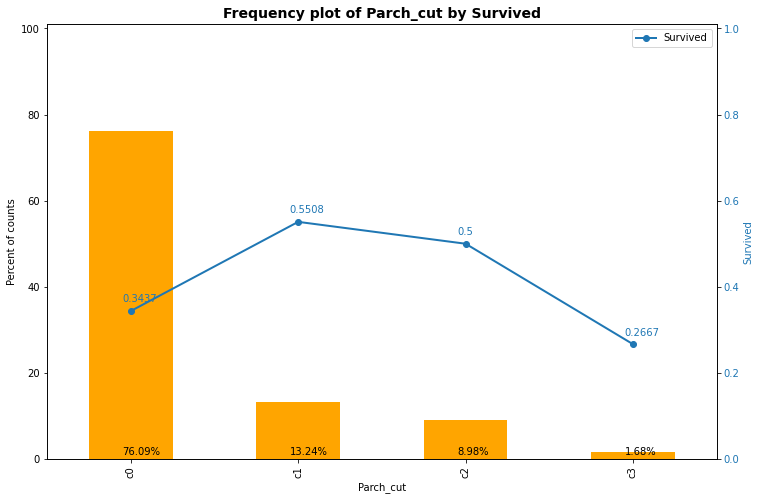

,count,pct,Survived
Parch_cut,,,
c0,678,76.09,0.3437
c1,118,13.24,0.5508
c2,80,8.98,0.5000
c3,15,1.68,0.2667


In [13]:
df_train['Parch_cut'] = df_train['Parch'].map(lambda x: 'c'+str(x) if x<3 else 'c3')
plot_xvars(df=df_train, xvar='Parch_cut', yvar='Survived')

## Fare

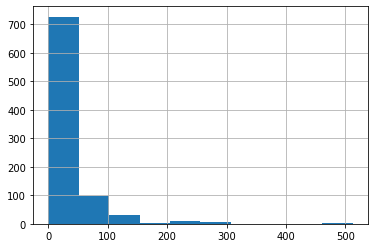

In [7]:
df_train['Fare'].hist(bins=10);

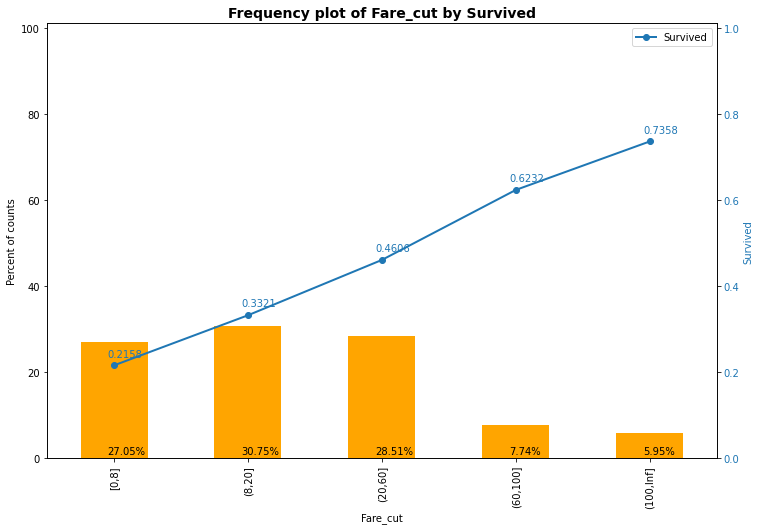

,count,pct,Survived
Fare_cut,,,
"[0,8]",241,27.05,0.2158
"(8,20]",274,30.75,0.3321
"(20,60]",254,28.51,0.4606
"(60,100]",69,7.74,0.6232
"(100,Inf]",53,5.95,0.7358


In [12]:
cut_labels = ['[0,8]', '(8,20]', '(20,60]','(60,100]', '(100,Inf]']
cut_bins = [0,8,20,60,100,np.Inf]
df_train['Fare_cut'] = pd.cut(df_train['Fare'], bins=cut_bins, labels=cut_labels, include_lowest=True)
plot_xvars(df=df_train, xvar='Fare_cut', yvar='Survived')

## Age

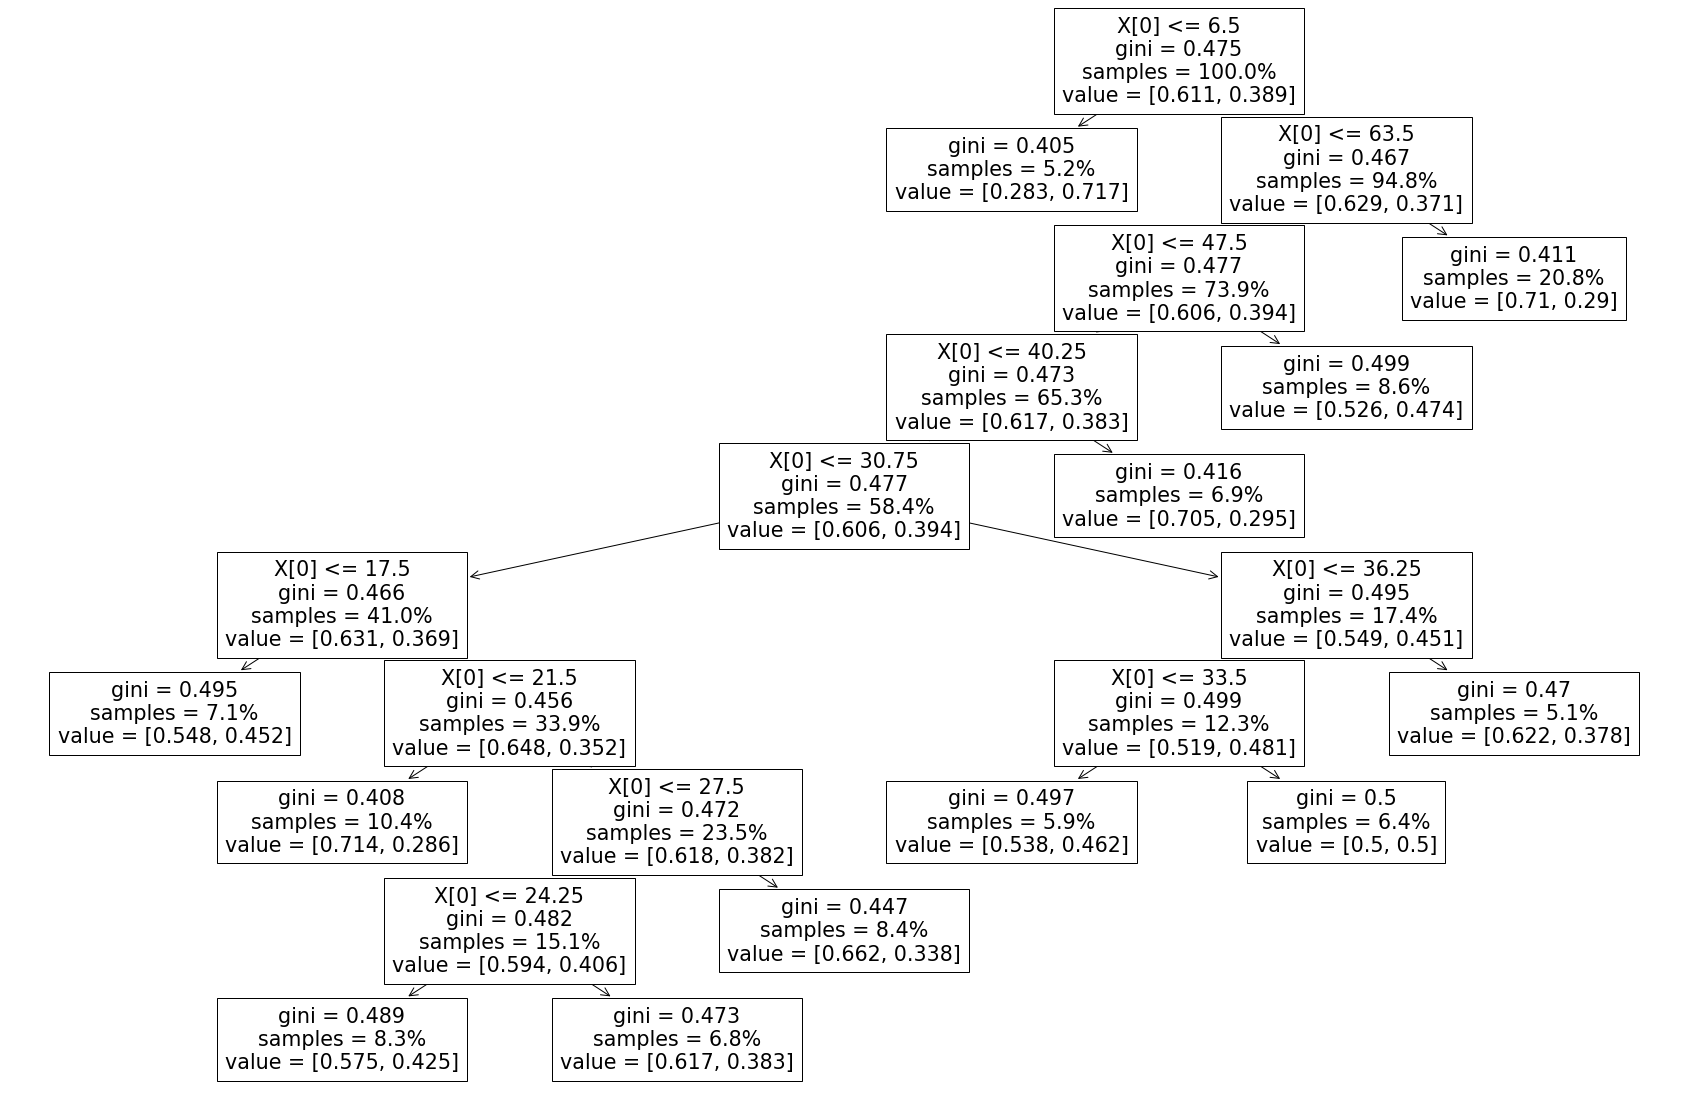

In [9]:
from sklearn import tree

X_train = df_train[['Age']].fillna(99)
y_train = df_train['Survived']
model = tree.DecisionTreeClassifier(min_samples_split=0.05, min_samples_leaf=0.05)
model.fit(X_train, y_train)
y_predict = model.predict(X_train)

plt.figure(figsize=(30,20))
tree.plot_tree(model, proportion=True, class_names=None)
plt.show()

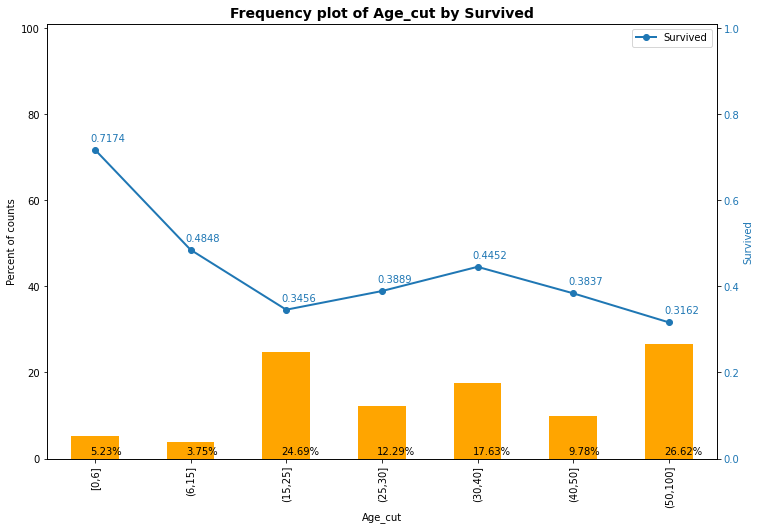

,count,pct,Survived
Age_cut,,,
"[0,6]",46,5.23,0.7174
"(6,15]",33,3.75,0.4848
"(15,25]",217,24.69,0.3456
"(25,30]",108,12.29,0.3889
"(30,40]",155,17.63,0.4452
"(40,50]",86,9.78,0.3837
"(50,100]",234,26.62,0.3162


In [10]:
cut_labels = ['[0,6]', '(6,15]', '(15,25]', '(25,30]', '(30,40]', '(40,50]', '(50,100]']
cut_bins = [0,6,15,25,30,40,50,100]
df_train['Age_cut'] = pd.cut(df_train['Age'].fillna(99), bins=cut_bins, labels=cut_labels, include_lowest=True)
plot_xvars(df=df_train, xvar='Age_cut', yvar='Survived')

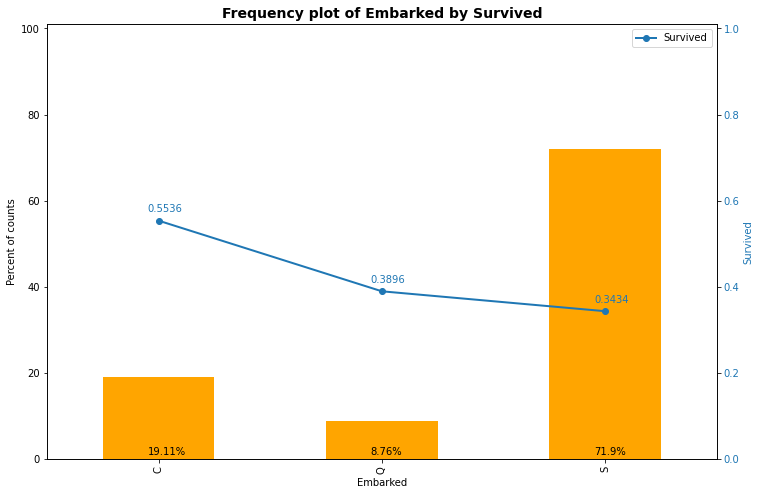

,count,pct,Survived
Embarked,,,
C,168,19.11,0.5536
Q,77,8.76,0.3896
S,632,71.90,0.3434


In [11]:
plot_xvars(df=df_train, xvar='Embarked', yvar='Survived')

In [12]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Parch_cut', 'Fare_cut',
       'Age_cut'],
      dtype='object')

In [13]:
df_train[df_train.SibSp>4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Parch_cut,Fare_cut,Age_cut


In [14]:
df_test[df_test.SibSp>4]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.90,NaN,S
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [15]:
df_train.shape

(879, 15)

In [16]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Parch_cut,Fare_cut,Age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,c0,"[0,8]","(15,25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,c0,"(60,100]","(30,40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,c0,"[0,8]","(25,30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,c0,"(20,60]","(30,40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,c0,"(8,20]","(30,40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,c0,"(8,20]","(25,30]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,c0,"(20,60]","(15,25]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,c2,"(20,60]","(50,100]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,c0,"(20,60]","(25,30]"


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  879 non-null    int64   
 1   Survived     879 non-null    int64   
 2   Pclass       879 non-null    int64   
 3   Name         879 non-null    object  
 4   Sex          879 non-null    object  
 5   Age          709 non-null    float64 
 6   SibSp        879 non-null    int64   
 7   Parch        879 non-null    int64   
 8   Ticket       879 non-null    object  
 9   Fare         879 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     877 non-null    object  
 12  Parch_cut    879 non-null    object  
 13  Fare_cut     879 non-null    category
 14  Age_cut      879 non-null    category
dtypes: category(2), float64(2), int64(5), object(6)
memory usage: 98.4+ KB


In [45]:
import pandas as pd
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import pickle

# ================================= Data preprocessor ======================================
disc_vars = ['SibSp','Parch']
cat_vars = ['Pclass','Sex','Embarked']
num_vars = ['Age','Fare']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

disc_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-999))])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='none')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_vars),
    ('disc', disc_transformer, disc_vars),
    ('cat', cat_transformer, cat_vars)])

# ================================= Building the model ======================================

# Spliting the data into test and train sets
X = df_train[num_vars + cat_vars + disc_vars]
y = df_train["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =.20, random_state=7)

# Fit the model
gbm_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', lgb.LGBMClassifier())])
scores = cross_validate(gbm_model, X_train, y_train, scoring='roc_auc') # roc_auc, accuracy
print('-' * 80)
print(str(gbm_model.named_steps['classifier']))
print('-' * 80)
for key, values in scores.items():
    print(key, ' mean ', values.mean())
    print(key, ' std ', values.std())
print('-' * 80)
gbm_model.fit(X_train, y_train)

# ================================= Saving the model ======================================
#pickle.dump(gbm_model, open('models/gbm_model.pickle', 'wb'))

--------------------------------------------------------------------------------
LGBMClassifier()
--------------------------------------------------------------------------------
fit_time  mean  0.333099365234375
fit_time  std  0.02383298983824611
score_time  mean  0.01392369270324707
score_time  std  0.002946225046039438
test_score  mean  0.8505289308972694
test_score  std  0.042389865439579906
--------------------------------------------------------------------------------


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('disc',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=-999,
                                                                                 strategy='constant'))]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                             

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =.20, random_state=7) # 3, 5
df_train.Survived.mean(), y_train.mean(), y_test.mean()

(0.3838383838383838, 0.38342696629213485, 0.3854748603351955)

In [3]:
import pickle
model_path = 'models/gbm_model.pickle'
gbm_model = pickle.load(open(model_path, 'rb'))

In [4]:
gbm_pred = gbm_model.predict(df_test)
gbm_proba = gbm_model.predict_proba(df_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [11]:
df_test['Survived'] = gbm_pred
df_test['Survived_proba'] = [v[1] for v in list(gbm_proba)]
df_test[['PassengerId','Survived']].to_csv('data/submission1.csv', index=False, sep=',', decimal='.')

In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred,proba,Survived,Survived_proba
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.044881,0,0.044881
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.033819,0,0.033819
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.088964,0,0.088964
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.016460,0,0.016460
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.318594,0,0.318594


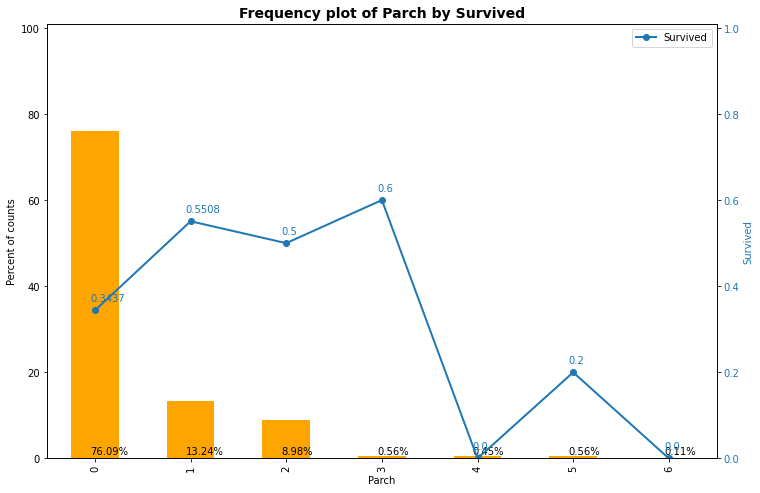

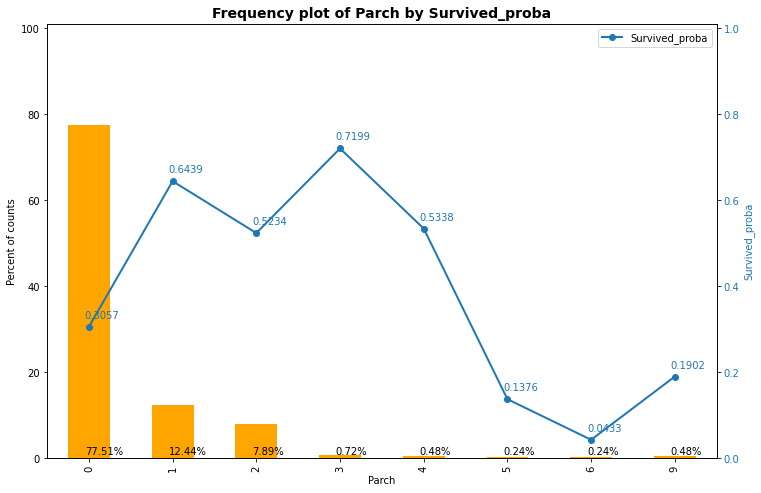

,count,pct,Survived_proba
Parch,,,
0,324,77.51,0.3057
1,52,12.44,0.6439
2,33,7.89,0.5234
3,3,0.72,0.7199
4,2,0.48,0.5338
5,1,0.24,0.1376
6,1,0.24,0.0433
9,2,0.48,0.1902


In [10]:
plot_xvars(df=df_train, xvar='Parch', yvar='Survived')
plot_xvars(df=df_test, xvar='Parch', yvar='Survived_proba')

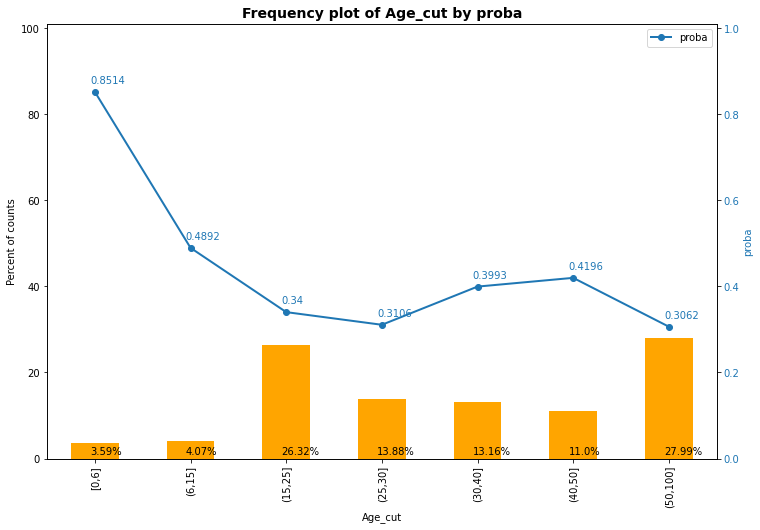

,count,pct,proba
Age_cut,,,
"[0,6]",15,3.59,0.8514
"(6,15]",17,4.07,0.4892
"(15,25]",110,26.32,0.3400
"(25,30]",58,13.88,0.3106
"(30,40]",55,13.16,0.3993
"(40,50]",46,11.00,0.4196
"(50,100]",117,27.99,0.3062


In [25]:
cut_labels = ['[0,6]', '(6,15]', '(15,25]', '(25,30]', '(30,40]', '(40,50]', '(50,100]']
cut_bins = [0,6,15,25,30,40,50,100]
df_test['Age_cut'] = pd.cut(df_test['Age'].fillna(99), bins=cut_bins, labels=cut_labels, include_lowest=True)
plot_xvars(df=df_test, xvar='Age_cut', yvar='proba')

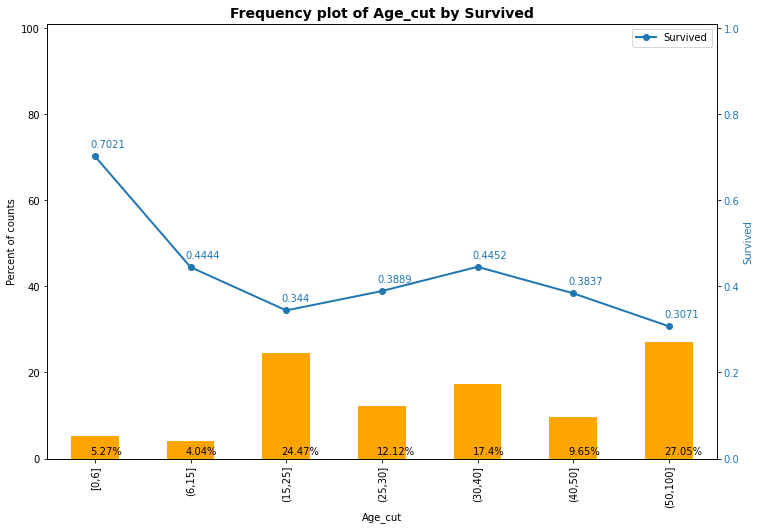

,count,pct,Survived
Age_cut,,,
"[0,6]",47,5.27,0.7021
"(6,15]",36,4.04,0.4444
"(15,25]",218,24.47,0.3440
"(25,30]",108,12.12,0.3889
"(30,40]",155,17.40,0.4452
"(40,50]",86,9.65,0.3837
"(50,100]",241,27.05,0.3071


In [26]:
cut_labels = ['[0,6]', '(6,15]', '(15,25]', '(25,30]', '(30,40]', '(40,50]', '(50,100]']
cut_bins = [0,6,15,25,30,40,50,100]
df_train['Age_cut'] = pd.cut(df_train['Age'].fillna(99), bins=cut_bins, labels=cut_labels, include_lowest=True)
plot_xvars(df=df_train, xvar='Age_cut', yvar='Survived')

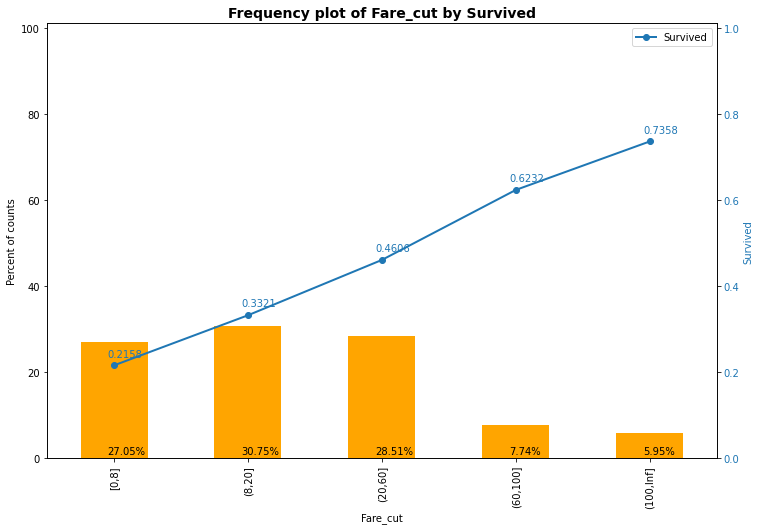

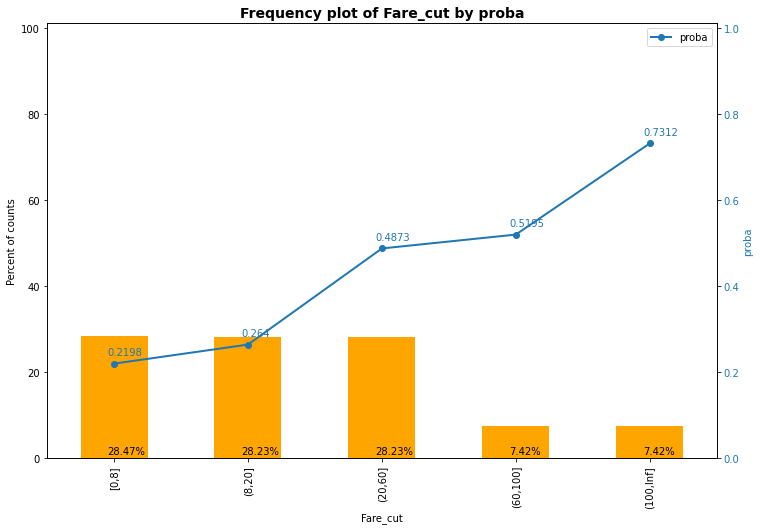

,count,pct,proba
Fare_cut,,,
"[0,8]",119,28.47,0.2198
"(8,20]",118,28.23,0.2640
"(20,60]",118,28.23,0.4873
"(60,100]",31,7.42,0.5195
"(100,Inf]",31,7.42,0.7312


In [28]:
cut_labels = ['[0,8]', '(8,20]', '(20,60]','(60,100]', '(100,Inf]']
cut_bins = [0,8,20,60,100,np.Inf]
df_train['Fare_cut'] = pd.cut(df_train['Fare'], bins=cut_bins, labels=cut_labels, include_lowest=True)
plot_xvars(df=df_train, xvar='Fare_cut', yvar='Survived')

cut_labels = ['[0,8]', '(8,20]', '(20,60]','(60,100]', '(100,Inf]']
cut_bins = [0,8,20,60,100,np.Inf]
df_test['Fare_cut'] = pd.cut(df_test['Fare'], bins=cut_bins, labels=cut_labels, include_lowest=True)
plot_xvars(df=df_test, xvar='Fare_cut', yvar='proba')